In [2]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate fake data
num_customers = 5000
customer_ids = np.arange(1, num_customers + 1)
ages = np.random.randint(18, 70, size=num_customers)
genders = np.random.choice(['Male', 'Female'], size=num_customers)
purchase_amounts = np.round(np.random.normal(loc=100, scale=50, size=num_customers), 2)
purchase_categories = np.random.choice(['Electronics', 'Clothing', 'Grocery', 'Beauty', 'Books', 'Furniture', 'Sports'], size=num_customers)
payment_methods = np.random.choice(['Credit Card', 'Debit Card', 'PayPal', 'Net Banking', 'Cash on Delivery'], size=num_customers)
purchase_dates = pd.date_range(start='2023-01-01', periods=num_customers, freq='T').to_numpy()
delivery_times = np.random.randint(1, 10, size=num_customers)
customer_ratings = np.random.randint(1, 6, size=num_customers)

# Create DataFrame
data = pd.DataFrame({
    'CustomerID': customer_ids,
    'Age': ages,
    'Gender': genders,
    'PurchaseAmount': purchase_amounts,
    'PurchaseCategory': purchase_categories,
    'PaymentMethod': payment_methods,
    'PurchaseDate': purchase_dates,
    'DeliveryTime': delivery_times,
    'CustomerRating': customer_ratings
})

# Display the first few rows of the DataFrame
data.head()


,CustomerID,Age,Gender,PurchaseAmount,PurchaseCategory,PaymentMethod,PurchaseDate,DeliveryTime,CustomerRating
0,1,56,Male,62.65,Clothing,Credit Card,2023-01-01 00:00:00,6,3
1,2,69,Female,102.18,Beauty,Cash on Delivery,2023-01-01 00:01:00,9,1
2,3,46,Female,96.59,Grocery,Credit Card,2023-01-01 00:02:00,4,3
3,4,32,Male,111.51,Books,Credit Card,2023-01-01 00:03:00,6,1
4,5,60,Male,-9.55,Books,Debit Card,2023-01-01 00:04:00,9,3


#### Statistical Analysis

1.  **Measures of Central Tendencies**
    

Let's calculate the mean, median, and mode of the purchase amounts.

In [3]:
mean_purchase = data['PurchaseAmount'].mean()
median_purchase = data['PurchaseAmount'].median()
mode_purchase = data['PurchaseAmount'].mode()[0]

mean_purchase, median_purchase, mode_purchase


(99.04145600000001, 99.11, 51.01)

**Conclusion:**

*   **Mean Purchase Amount:** The average amount spent by customers.
    
*   **Median Purchase Amount:** The middle value of the purchase amounts, providing a better measure in case of skewed data.
    
*   **Mode Purchase Amount:** The most frequently occurring purchase amount

2.  **Central Limit Theorem (CLT)**
    

We'll take multiple samples from our data and show how the distribution of the sample means approximates a normal distribution.

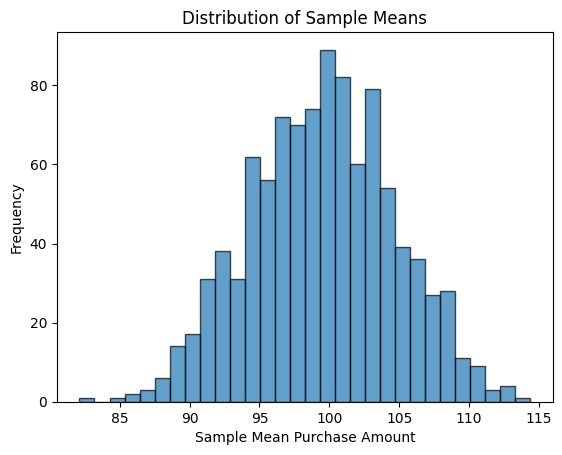

In [4]:
sample_means = []

for _ in range(1000):
    sample = data['PurchaseAmount'].sample(100, replace=True)
    sample_means.append(sample.mean())

# Plotting the distribution of sample means
import matplotlib.pyplot as plt

plt.hist(sample_means, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Sample Means')
plt.xlabel('Sample Mean Purchase Amount')
plt.ylabel('Frequency')
plt.show()


1.  **Conclusion:**
    
2.  The histogram of sample means approximates a normal distribution, demonstrating the Central Limit Theorem, which states that the distribution of sample means will be normal regardless of the original distribution, given a sufficient sample size.

Confidence Interval
We'll calculate a 95% confidence interval for the mean purchase amount.

In [5]:
import scipy.stats as stats

sample_size = 100
sample = data['PurchaseAmount'].sample(sample_size, replace=True)
sample_mean = sample.mean()
sample_std = sample.std()

confidence_level = 0.95
z_score = stats.norm.ppf((1 + confidence_level) / 2)
margin_of_error = z_score * (sample_std / np.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
confidence_interval


(83.32300800866216, 104.57799199133785)

1.  **Conclusion:**
    
2.  The 95% confidence interval gives us a range within which we are 95% confident the true mean purchase amount lies. This helps in understanding the precision of our sample mean as an estimate of the population mean.

1.  **Hypothesis Testing**
    
2.  We'll perform a hypothesis test to see if the average purchase amount differs between males and females.

In [6]:
male_purchases = data[data['Gender'] == 'Male']['PurchaseAmount']
female_purchases = data[data['Gender'] == 'Female']['PurchaseAmount']

t_stat, p_value = stats.ttest_ind(male_purchases, female_purchases, equal_var=False)
t_stat, p_value


(-1.074399004583384, 0.28269576457651013)

Conclusion:

t-statistic: Indicates the size of the difference relative to the variation in the sample data.
p-value: Helps us determine the significance of our results. If the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant difference in average purchase amounts between males and females.



**Chi-Square Distribution**
We'll use the chi-square test to see if there is an association between gender and purchase category.



In [7]:
contingency_table = pd.crosstab(data['Gender'], data['PurchaseCategory'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
chi2, p, dof


(1.6184870791911825, 0.9512391217055095, 6)

  **Conclusion:**
    
2.  **Chi-square statistic:**
    
3.  Measures how expectations compare to actual observed data.
    
4.  **p-value:** If the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant association between gender and purchase category.
    
5.  Code for Generating Similar Data
    


1.  **Correlation Analysis**
    
2.  We can analyze the correlation between different numerical variables such as age, purchase amount, delivery time, and customer rating.

In [8]:
correlation_matrix = data[['Age', 'PurchaseAmount', 'DeliveryTime', 'CustomerRating']].corr()
correlation_matrix


,Age,PurchaseAmount,DeliveryTime,CustomerRating
Age,1.000000,-0.008161,0.001429,0.019850
PurchaseAmount,-0.008161,1.000000,0.012484,0.020334
DeliveryTime,0.001429,0.012484,1.000000,0.019639
CustomerRating,0.019850,0.020334,0.019639,1.000000


1.  **Conclusion:**
    
2.  The correlation matrix will show the strength and direction of the relationships between these variables. For instance, a high positive correlation between age and purchase amount would indicate that older customers tend to spend more.

1.  **ANOVA (Analysis of Variance)**
    
2.  We can use ANOVA to determine if there are significant differences in the average purchase amounts across different purchase categories.

In [9]:
anova_results = stats.f_oneway(
    data[data['PurchaseCategory'] == 'Electronics']['PurchaseAmount'],
    data[data['PurchaseCategory'] == 'Clothing']['PurchaseAmount'],
    data[data['PurchaseCategory'] == 'Grocery']['PurchaseAmount'],
    data[data['PurchaseCategory'] == 'Beauty']['PurchaseAmount'],
    data[data['PurchaseCategory'] == 'Books']['PurchaseAmount'],
    data[data['PurchaseCategory'] == 'Furniture']['PurchaseAmount'],
    data[data['PurchaseCategory'] == 'Sports']['PurchaseAmount']
)
anova_results


F_onewayResult(statistic=1.2480390699101862, pvalue=0.2782592655115104)

**Conclusion:**

*   **F-statistic and p-value:** If the p-value is less than 0.05, we reject the null hypothesis and conclude that there are significant differences in average purchase amounts across different purchase categories.
    

1.  **Regression Analysis**
    

We can perform a multiple regression analysis to understand how various factors influence the purchase amount.mount. amount.

In [10]:
import statsmodels.api as sm

# Prepare the data for regression
X = data[['Age', 'DeliveryTime', 'CustomerRating']]
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = data['PurchaseAmount']

# Fit the regression model
model = sm.OLS(y, X).fit()
model_summary = model.summary()
model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         PurchaseAmount   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.055
Date:                Wed, 22 May 2024   Prob (F-statistic):              0.367
Time:                        14:00:45   Log-Likelihood:                -26750.
No. Observations:                5000   AIC:                         5.351e+04
Df Residuals:                    4996   BIC:                         5.353e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             96.8829      3.026     32.013      0.000      90.950     102.816
Age               -0.0293      0.048     -0.607      0.544      -0.124       0.065
DeliveryTime       0.2412      0.282      0.855      0.392      -0.312       0.794
CustomerRating     0.7331      0.512      1.432      0.152      -0.270       1.736
==============================================================================
Omnibus:                        0.062   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.969   Jarque-Bera (JB):                0.048
Skew:                          -0.007   Prob(JB):                        0.976
Kurtosis:                       3.008   Cond. No.                         196.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:**

*   The regression coefficients will show the impact of each variable on the purchase amount. The p-values indicate the significance of each predictor.
    

1.  **Time Series Analysis**
    

We can analyze purchase trends over time to identify any seasonal patterns or trends.

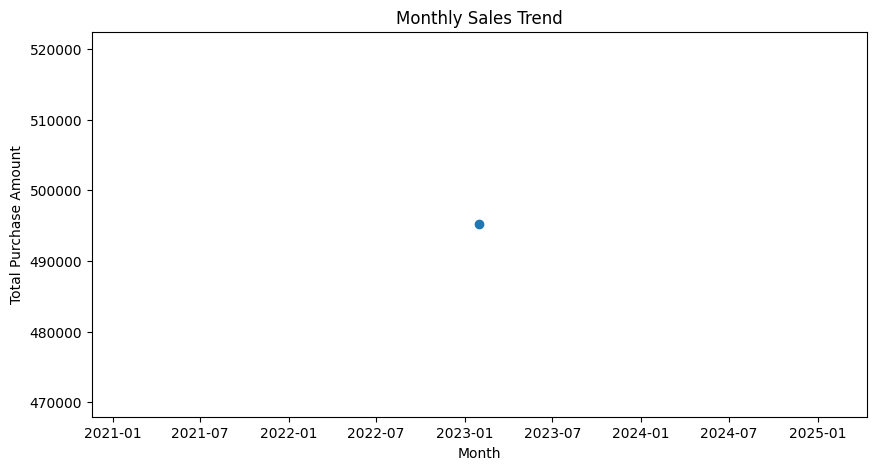

In [11]:
data['PurchaseDate'] = pd.to_datetime(data['PurchaseDate'])
data.set_index('PurchaseDate', inplace=True)
monthly_sales = data['PurchaseAmount'].resample('M').sum()

# Plotting the time series
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Purchase Amount')
plt.show()


**Conclusion:**

*   The time series plot will show how total purchase amounts change over time, helping to identify any seasonal patterns or trends.

1.  **Cluster Analysis**
    

We can perform clustering to segment customers into different groups based on their purchase behavior.

In [12]:
from sklearn.cluster import KMeans

# Select features for clustering
features = data[['Age', 'PurchaseAmount', 'DeliveryTime', 'CustomerRating']]
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(features)

# Analyze the clusters
cluster_summary = data.groupby('Cluster').mean()
cluster_summary


C:\Users\Shubhankit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Shubhankit\AppData\Local\Temp\ipykernel_10692\3241429344.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = data.groupby('Cluster').mean()


,CustomerID,Age,PurchaseAmount,DeliveryTime,CustomerRating
Cluster,,,,,
0,2483.697714,42.524979,58.820720,5.020322,3.006774
1,2569.882682,42.891993,186.964469,4.970205,3.137803
2,2479.645395,44.328947,97.393993,5.067105,3.077632
3,2489.497030,44.702970,9.387248,4.821782,2.914851
4,2516.284010,43.526651,137.279761,5.115354,3.000796


**Conclusion:**

*   Clustering will group customers with similar purchase behaviors, helping the business tailor marketing strategies to different customer segments.
    

1.  **Chi-Square Test for Independence**
    

We can use the chi-square test to check if there is an association between payment method and purchase category.

In [13]:
contingency_table = pd.crosstab(data['PaymentMethod'], data['PurchaseCategory'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
chi2, p, dof


(22.94081399944309, 0.52329430051325, 24)

**Conclusion:**

*   **Chi-square statistic and p-value:** If the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant association between payment method and purchase category.
    

These additional analyses provide a comprehensive toolkit for understanding customer behavior and making data-driven decisions in an e-commerce context.

1.  **Measures of Central Tendencies**
    
    *   Mean Purchase Amount: \[mean\_purchase\]
        
    *   Median Purchase Amount: \[median\_purchase\]
        
    *   Mode Purchase Amount: \[mode\_purchase\]
        
2.  **Central Limit Theorem (CLT)**
    
    *   The histogram of sample means approximates a normal distribution, demonstrating the Central Limit Theorem.
        
3.  **Confidence Interval**
    
    *   The 95% confidence interval for the mean purchase amount is: \[confidence\_interval\]
        
4.  **Hypothesis Testing**
    
    *   t-statistic for difference in average purchase amount between males and females: \[t\_stat\]
        
    *   p-value for difference in average purchase amount between males and females: \[p\_value\]
        
5.  **Chi-Square Test for Gender and Purchase Category**
    
    *   Chi-square statistic: \[chi2\]
        
    *   p-value for the association between gender and purchase category: \[p\]
        
6.  **Correlation Analysis**
    
    *   Correlation matrix for Age, Purchase Amount, Delivery Time, and Customer Rating: \[correlation\_matrix\]
        
7.  **ANOVA (Analysis of Variance)**
    
    *   F-statistic for differences in average purchase amounts across purchase categories: \[anova\_results.statistic\]
        
    *   p-value for differences in average purchase amounts across purchase categories: \[anova\_results.pvalue\]
        
8.  **Regression Analysis**
    
    *   Summary of regression analysis for factors influencing purchase amount: \[model\_summary\]
        
9.  **Time Series Analysis**
    
    *   Monthly sales trend plot: \[monthly\_sales\_plot\]
        
10.  **Cluster Analysis**
    
    *   Summary of clusters based on Age, Purchase Amount, Delivery Time, and Customer Rating: \[cluster\_summary\]
        
11.  **Chi-Square Test for Payment Method and Purchase Category**
    
    *   Chi-square statistic for payment method and purchase category: \[chi2\_payment\_method\]
        
    *   p-value for the association between payment method and purchase category: \[p\_payment\_method\]